Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Datasights_Dataset.csv')

In [3]:
df.columns

Index(['customer_id', 'name', 'age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default'],
      dtype='object')

In [4]:
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [5]:
df.drop(columns=['customer_id', 'name'], inplace=True)

In [6]:
#Binary encoding:
df['gender'].replace({'F': 0, 'M': 1}, inplace=True)

In [7]:
df['owns_car'].replace({'Y': 0, 'N': 1}, inplace=True)
df['owns_house'].replace({'Y': 0, 'N': 1}, inplace=True)

In [8]:
df['credit_card_default'].value_counts()

0    41831
1     3697
Name: credit_card_default, dtype: int64

In [9]:
df.isna().sum()

age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [10]:
df['credit_card_default'][df['owns_car'].isna()].value_counts()

0    501
1     46
Name: credit_card_default, dtype: int64

In [11]:
df['owns_car'].value_counts()

1.0    29743
0.0    15238
Name: owns_car, dtype: int64

In [12]:
pd.crosstab(df['owns_car'], df['credit_card_default'])




credit_card_default,0,1
owns_car,,
0.0,14101,1137
1.0,27229,2514


In [13]:
df['no_of_children'].value_counts()

0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
7.0        1
8.0        1
9.0        1
Name: no_of_children, dtype: int64

In [14]:
pd.crosstab(df['no_of_children'], df['credit_card_default'])

credit_card_default,0,1
no_of_children,,
0.0,28854,2387
1.0,8146,839
2.0,3522,340
3.0,534,50
4.0,49,11
5.0,10,3
6.0,6,0
7.0,1,0
8.0,1,0


In [15]:
df['no_of_days_employed'].nunique()

7874

<Axes: ylabel='Frequency'>

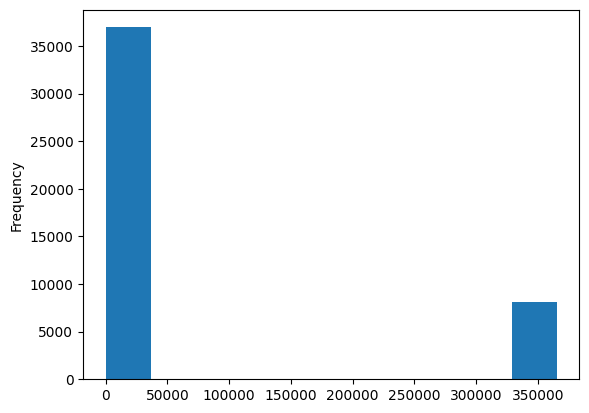

In [16]:
df['no_of_days_employed'].plot(kind='hist')

In [17]:
#we see there are some data point which suggest that customer have been employed for 
df['no_of_days_employed'][df['no_of_days_employed']>365*40].value_counts()

365246.0    684
365244.0    669
365240.0    641
365245.0    631
365241.0    628
365247.0    625
365250.0    609
365251.0    607
365243.0    607
365252.0    602
365249.0    601
365242.0    600
365248.0    594
15341.0       2
15123.0       1
15047.0       1
14752.0       1
14824.0       1
15473.0       1
15851.0       1
14946.0       1
15053.0       1
15226.0       1
15631.0       1
15632.0       1
15019.0       1
14994.0       1
15162.0       1
14641.0       1
16067.0       1
16118.0       1
14624.0       1
15078.0       1
14811.0       1
17538.0       1
15401.0       1
16368.0       1
16849.0       1
15280.0       1
Name: no_of_days_employed, dtype: int64

In [18]:
# it seems like there is some issues with data collection all those 365xxx values might be 365+xxx so lets replace them. there are about 20% of data like that we can't drop them.
def replace_value(value):
    if value > 365000:
        last_three_digits = value % 1000
        return 365 + last_three_digits
    else:
        return value

df['no_of_days_employed'] = df['no_of_days_employed'].apply(replace_value)

<Axes: ylabel='Frequency'>

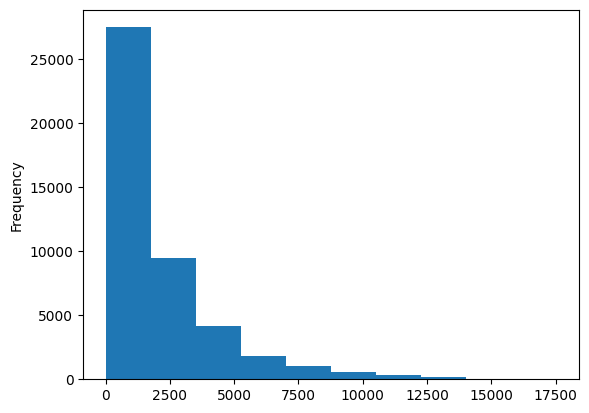

In [19]:
df['no_of_days_employed'].plot(kind='hist')

In [20]:
df.columns

Index(['age', 'gender', 'owns_car', 'owns_house', 'no_of_children',
       'net_yearly_income', 'no_of_days_employed', 'occupation_type',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months', 'credit_card_default'],
      dtype='object')

In [21]:
cols = ['owns_car', 'no_of_children', 'no_of_days_employed', 'total_family_members','migrant_worker', 'yearly_debt_payments']

for col in cols:
    df[col].fillna(df[col].median(), inplace=True)

In [71]:
df['gender'] = df['gender'].replace('XNA', np.nan)
df['gender'] = df['gender'].astype(float)
df['gender'].fillna(df['gender'].median(), inplace=True)

In [22]:
df.dropna(subset=['credit_score'], inplace=True)

In [23]:
df.shape

(45520, 17)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45520 entries, 0 to 45527
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      45520 non-null  int64  
 1   gender                   45520 non-null  object 
 2   owns_car                 45520 non-null  float64
 3   owns_house               45520 non-null  int64  
 4   no_of_children           45520 non-null  float64
 5   net_yearly_income        45520 non-null  float64
 6   no_of_days_employed      45520 non-null  float64
 7   occupation_type          45520 non-null  object 
 8   total_family_members     45520 non-null  float64
 9   migrant_worker           45520 non-null  float64
 10  yearly_debt_payments     45520 non-null  float64
 11  credit_limit             45520 non-null  float64
 12  credit_limit_used(%)     45520 non-null  int64  
 13  credit_score             45520 non-null  float64
 14  prev_defaults         

In [25]:
df.columns

Index(['age', 'gender', 'owns_car', 'owns_house', 'no_of_children',
       'net_yearly_income', 'no_of_days_employed', 'occupation_type',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months', 'credit_card_default'],
      dtype='object')

['age', 'gender', 'owns_car', 'owns_house', 'no_of_children', 'total_family_members', 'migrant_worker', 'prev_defaults', 'default_in_last_6months', 'credit_card_default', 'occupation_type']


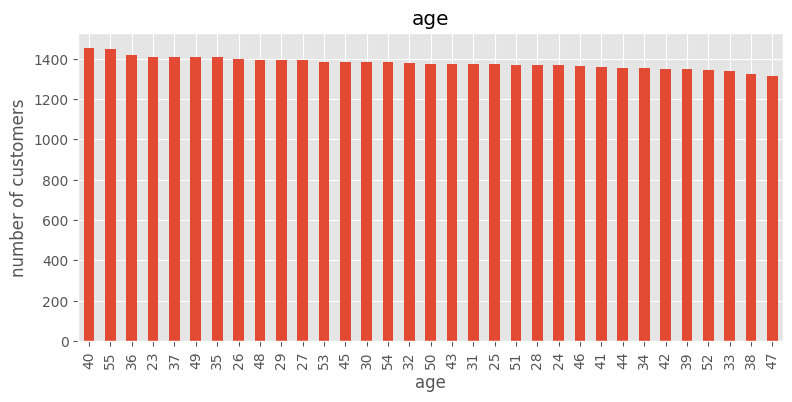

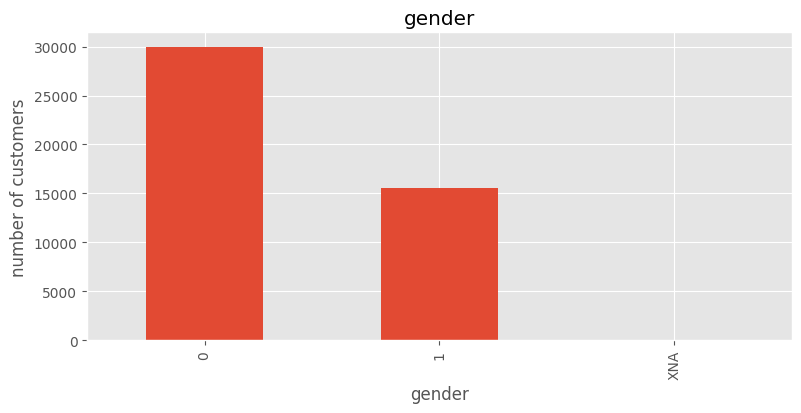

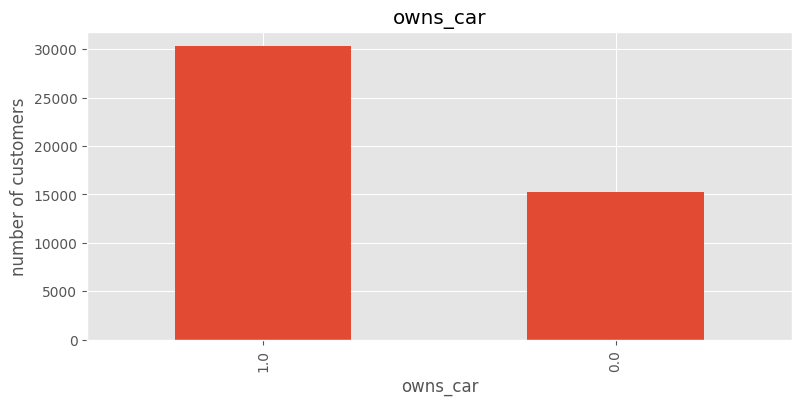

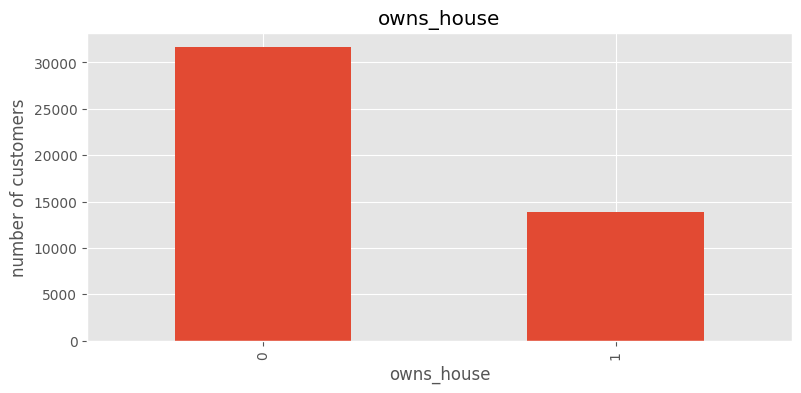

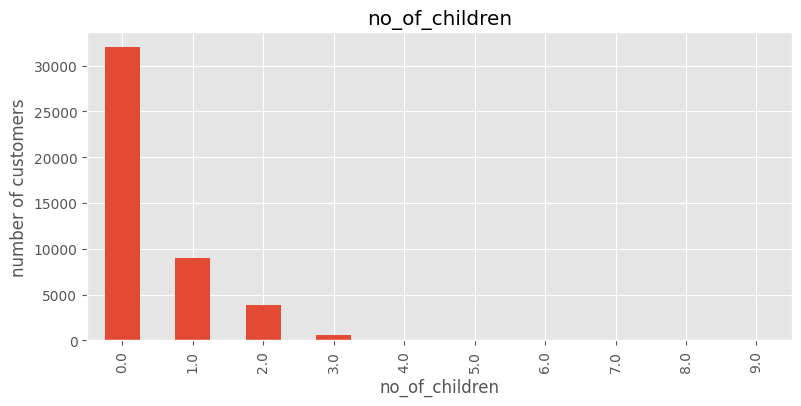

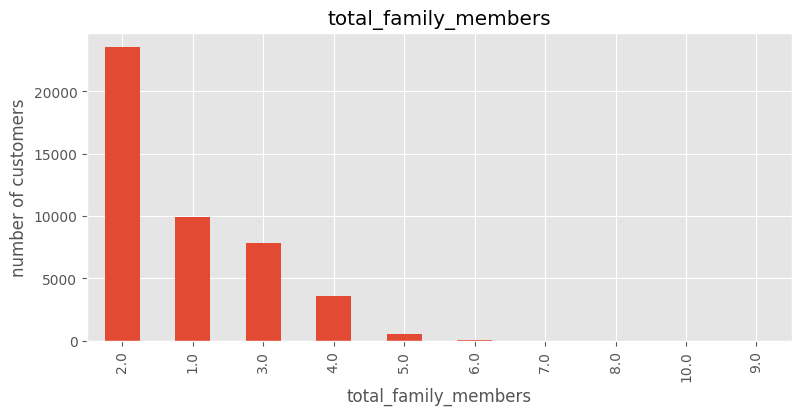

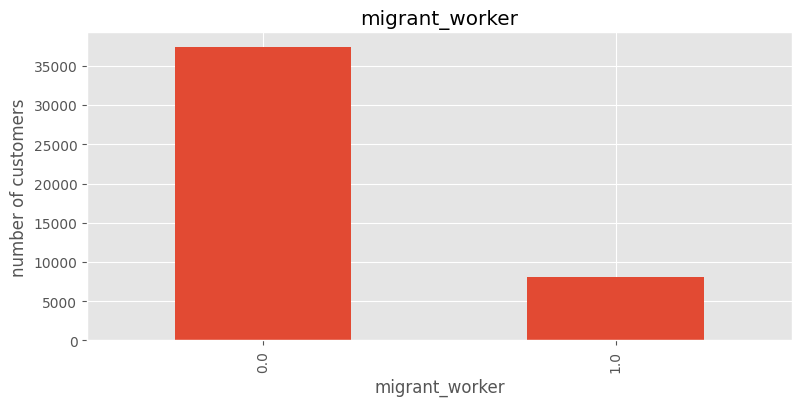

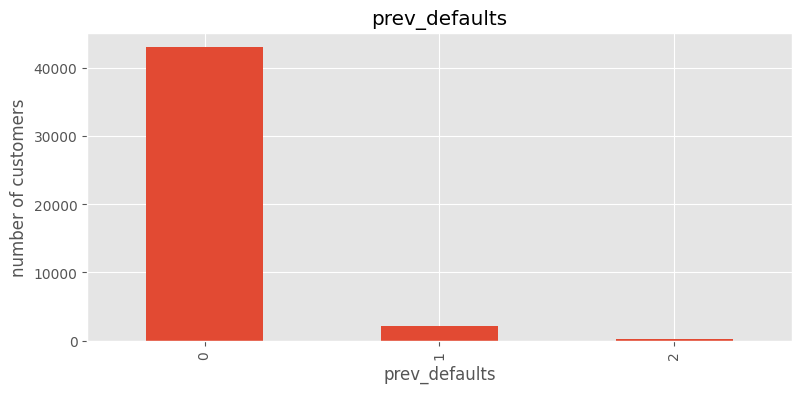

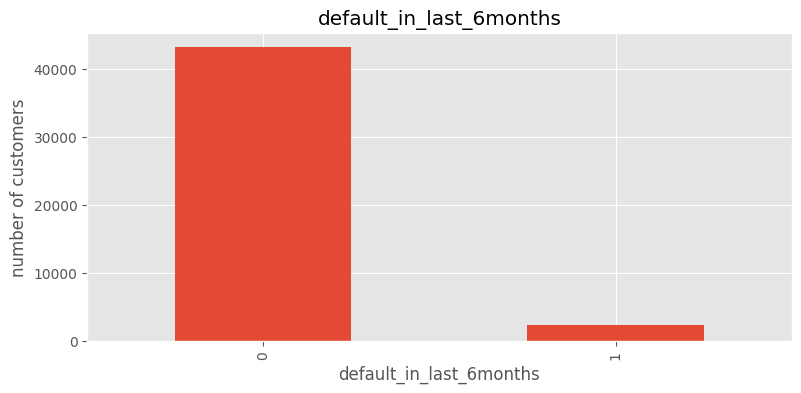

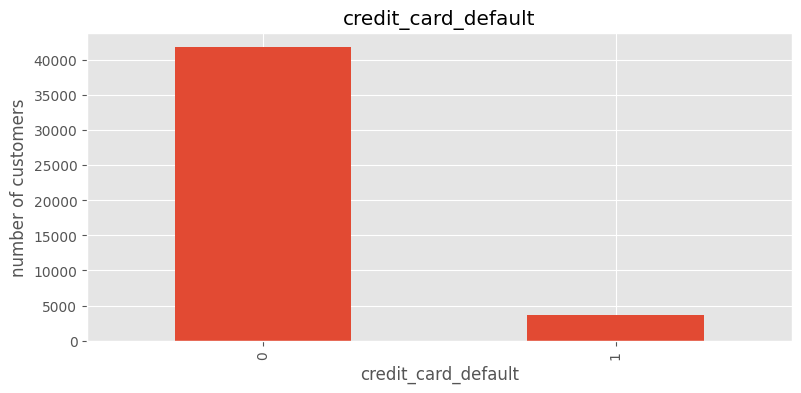

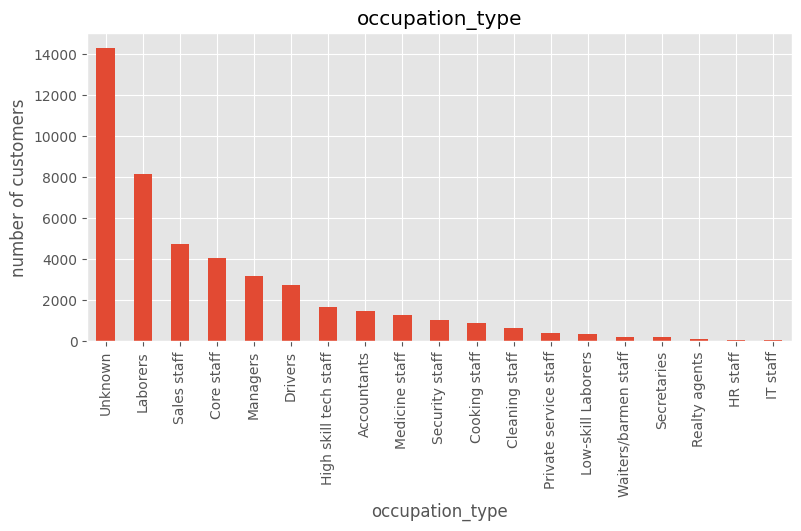

In [28]:
cat_var= ['age', 'gender', 'owns_car', 'owns_house', 'no_of_children','total_family_members', 'migrant_worker','prev_defaults','default_in_last_6months', 'credit_card_default','occupation_type',]
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

<Axes: >

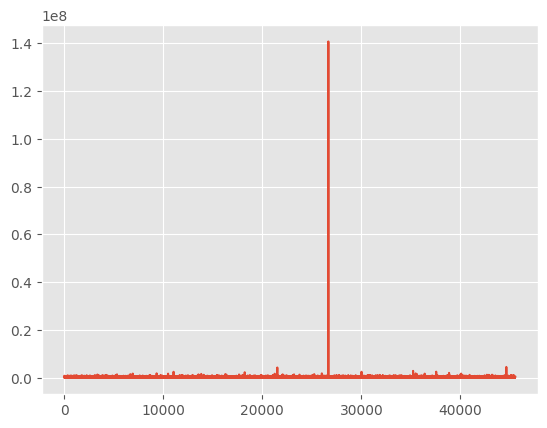

In [35]:
df['net_yearly_income'].plot(kind='line')

In [36]:
df['net_yearly_income'].describe()

count    4.552000e+04
mean     2.006530e+05
std      6.691323e+05
min      2.717061e+04
25%      1.263393e+05
50%      1.717076e+05
75%      2.406038e+05
max      1.407590e+08
Name: net_yearly_income, dtype: float64

In [60]:
df['net_yearly_income'][df['net_yearly_income']>1500000]

6912     1651656.75
9325     1749474.14
10480    1628254.13
13828    1506272.99
21244    1600664.39
26006    1744138.13
35478    1741728.39
36390    1629551.83
38851    1947528.14
40074    1646328.92
Name: net_yearly_income, dtype: float64

<Axes: >

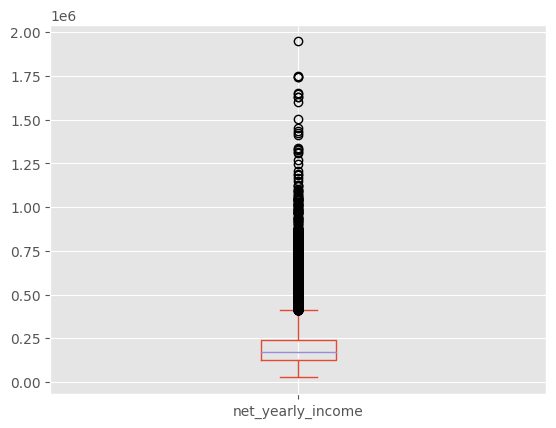

In [61]:
df['net_yearly_income'].plot(kind='box')

In [52]:
df = df[df['net_yearly_income'] < 1500000]

<Axes: ylabel='Frequency'>

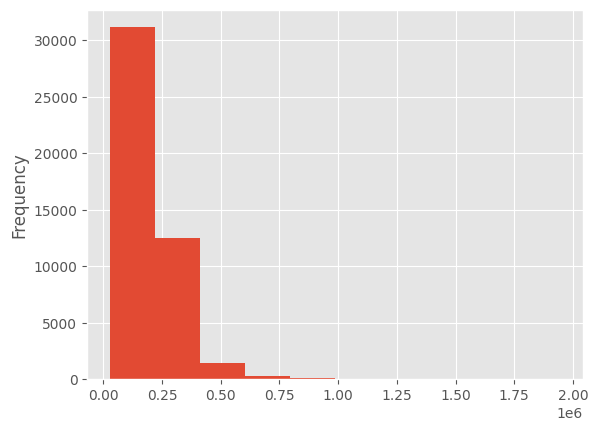

In [62]:
df['net_yearly_income'].plot(kind='hist')

<Axes: >

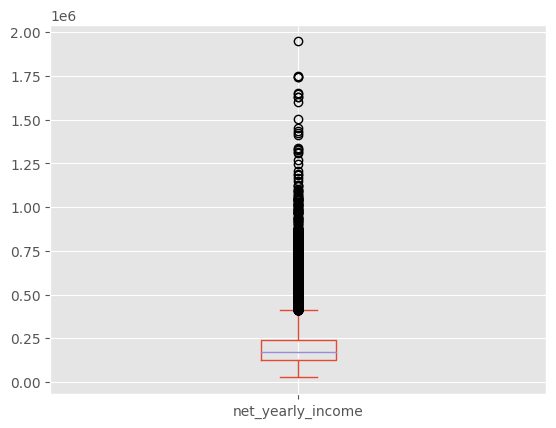

In [63]:
df['net_yearly_income'].plot(kind='box')

In [64]:
df.columns

Index(['age', 'gender', 'owns_car', 'owns_house', 'no_of_children',
       'net_yearly_income', 'no_of_days_employed', 'occupation_type',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months', 'credit_card_default'],
      dtype='object')

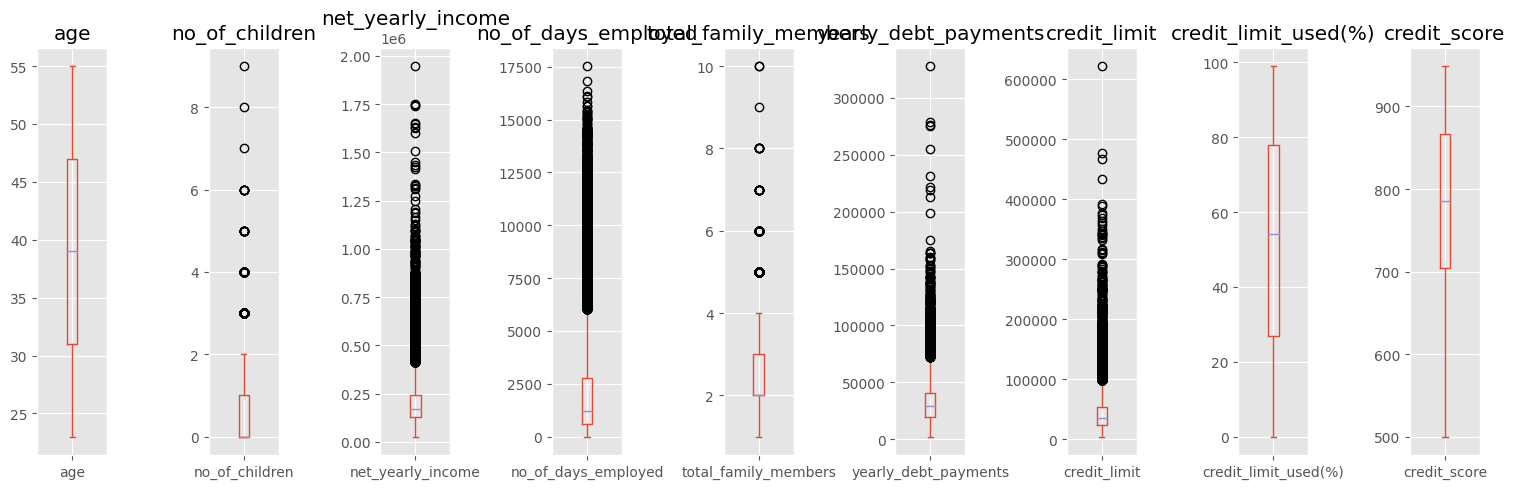

In [76]:
cols = ['age',  'no_of_children',
       'net_yearly_income', 'no_of_days_employed',
       'total_family_members',  'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 
       ]


fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(15, 5))  # Adjust figsize as needed

for i, col in enumerate(cols):
    df[col].plot(kind='box', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()
